<a href="https://colab.research.google.com/github/sagasucksatlife1/QunatProjects-Main/blob/main/qunat_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
raw_data = yf.download (['TSLA', 'NVDA', 'GME', 'COIN'], start='2019-01-01', end='2025-01-01')
data = raw_data['Close']
data = data.dropna()
print(data.head(10))
print(data.columns)
# now this data has been extracted for future porposes and now can be used whenever needed to be performed on

/tmp/ipython-input-3285444835.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download (['TSLA', 'NVDA', 'GME', 'COIN'], start='2019-01-01', end='2025-01-01')
[*********************100%***********************]  4 of 4 completed

Ticker            COIN        GME       NVDA        TSLA
Date                                                    
2021-04-14  328.279999  41.632500  15.240265  244.076660
2021-04-15  322.750000  39.110001  16.098448  246.283340
2021-04-16  342.000000  38.672501  15.874236  246.593338
2021-04-19  333.000000  41.092499  15.324812  238.210007
2021-04-20  320.820007  39.632500  15.134769  239.663330
2021-04-21  311.920013  39.627499  15.323565  248.039993
2021-04-22  293.450012  37.792500  14.814541  239.896667
2021-04-23  291.600006  37.794998  15.228545  243.133331
2021-04-26  304.540009  42.232498  15.440781  246.066666
2021-04-27  302.000000  44.442501  15.344762  234.913330
Index(['COIN', 'GME', 'NVDA', 'TSLA'], dtype='object', name='Ticker')


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
returns = data.pct_change()
returns = returns.dropna()
print(returns.shape)
annualzed_return= returns.mean()*252
annualzed_vol=  returns.std()* np.sqrt(252)
sharpe_ratio = (annualzed_return - 0.02) / annualzed_vol
print("annualzed_return")
print(annualzed_return)
print("annualzed_vol")
print(annualzed_vol)
print("sharpe_ratio")
print(sharpe_ratio)
corelation= returns.corr()
print("corelation")
print(corelation)







(935, 4)
annualzed_return
Ticker
COIN    0.319401
GME     0.472393
NVDA    0.726406
TSLA    0.309157
dtype: float64
annualzed_vol
Ticker
COIN    0.893841
GME     1.090593
NVDA    0.531982
TSLA    0.590462
dtype: float64
sharpe_ratio
Ticker
COIN    0.334960
GME     0.414814
NVDA    1.327875
TSLA    0.489714
dtype: float64
corelation
Ticker      COIN       GME      NVDA      TSLA
Ticker                                        
COIN    1.000000  0.315460  0.442053  0.456401
GME     0.315460  1.000000  0.224383  0.269526
NVDA    0.442053  0.224383  1.000000  0.447096
TSLA    0.456401  0.269526  0.447096  1.000000


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
cov_matrix = returns.cov() * 252
print(cov_matrix)
weight = np.array([0.25 , 0.25 , 0.25 , 0.25])
portfolio_returns = np.dot(weight, annualzed_return)
portfolio_variance = np.dot(weight.T, np.dot(cov_matrix, weight))
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_sharpe = (portfolio_returns - 0.2)/ portfolio_volatility
print("portfolio_returns")
print(portfolio_returns)
print("portfolio_volatility")
print(portfolio_volatility)
print("portfolio_sharpe")
print(portfolio_sharpe)


Ticker      COIN       GME      NVDA      TSLA
Ticker                                        
COIN    0.798951  0.307515  0.210200  0.240879
GME     0.307515  1.189392  0.130182  0.173562
NVDA    0.210200  0.130182  0.283005  0.140440
TSLA    0.240879  0.173562  0.140440  0.348645
portfolio_returns
0.45683944649745006
portfolio_volatility
0.5604433218636375
portfolio_sharpe
0.4582790738649253


In [ ]:
#max sharpe ratio
from scipy.optimize import minimize
def negative_sharpe(weight):
    portfolio_return = np.dot(weight, annualzed_return)
    portfolio_variance = np.dot(weight.T, np.dot(cov_matrix, weight))
    portfolio_volatility = np.sqrt(portfolio_variance)
    sharpe = (portfolio_return - 0.02) / portfolio_volatility
    return -sharpe
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
bounds = tuple((0, 1) for _ in range(4))
initial_weights = np.array([0.25, 0.25, 0.25, 0.25])


result = minimize(negative_sharpe, initial_weights, method='SLSQP',
                  bounds=bounds, constraints=constraints)
optimal_weight = result.x
print("Optimal weights:", optimal_weight)

Optimal weights: [3.69099261e-17 4.40729220e-02 9.55927078e-01 4.86806780e-17]


In [ ]:
optimal_return = np.dot(optimal_weight,annualzed_return)
optimal_varaince = np.dot(optimal_weight.T, np.dot(cov_matrix, optimal_weight))
optimal_volatility = np.sqrt(optimal_varaince)
optimal_sharpe = (optimal_return - 0.02) / optimal_volatility
print("optimal_return")
print(optimal_return)
print("optimal_volatility")
print(optimal_volatility)
print("optimal_sharpe")
print(optimal_sharpe)

optimal_return
0.7152108310877714
optimal_volatility
0.521429341266896
optimal_sharpe
1.3332790774655017


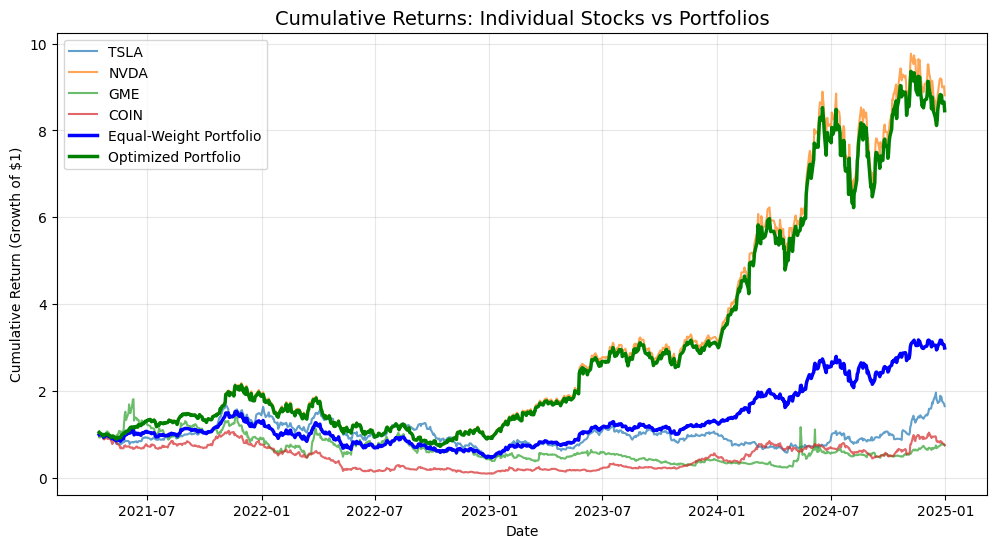

In [10]:
import matplotlib.pyplot as plt

# Calculate cumulative returns for each stock
cumulative_returns = (1 + returns).cumprod()

# Calculate portfolio cumulative returns
equal_weight_cumulative = (cumulative_returns * np.array([0.25, 0.25, 0.25, 0.25])).sum(axis=1)
optimal_cumulative = (cumulative_returns * optimal_weight).sum(axis=1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns['TSLA'], label='TSLA', alpha=0.7)
plt.plot(cumulative_returns.index, cumulative_returns['NVDA'], label='NVDA', alpha=0.7)
plt.plot(cumulative_returns.index, cumulative_returns['GME'], label='GME', alpha=0.7)
plt.plot(cumulative_returns.index, cumulative_returns['COIN'], label='COIN', alpha=0.7)
plt.plot(cumulative_returns.index, equal_weight_cumulative, label='Equal-Weight Portfolio', linewidth=2.5, color='blue')
plt.plot(cumulative_returns.index, optimal_cumulative, label='Optimized Portfolio', linewidth=2.5, color='green')

plt.title('Cumulative Returns: Individual Stocks vs Portfolios', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Growth of $1)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

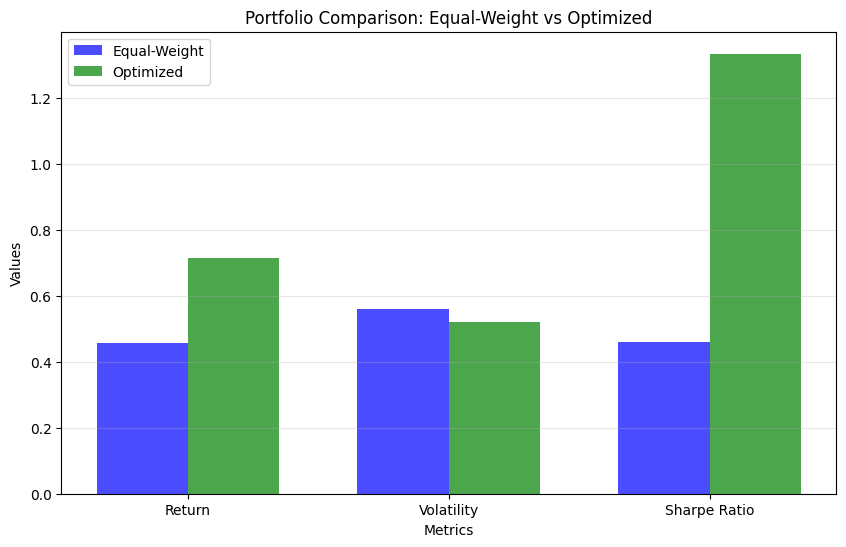

In [ ]:
# Prepare data for comparison
metrics = ['Return', 'Volatility', 'Sharpe Ratio']
equal_weight_metrics = [portfolio_returns, portfolio_volatility, portfolio_sharpe]
optimized_metrics = [optimal_return, optimal_volatility, optimal_sharpe]

# Create bar chart
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, equal_weight_metrics, width, label='Equal-Weight', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, optimized_metrics, width, label='Optimized', color='green', alpha=0.7)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Portfolio Comparison: Equal-Weight vs Optimized')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()